# **Market Segmentation of Electronic Vehicles in India**


---



## Niyati Mehta Feynn Labs

Dataset Details:


1.   State wise distribution of 2,3,4 wheeler EV s and passenger cars in India
2.   Brands and models of EVs in India with their attributes



# **Imports**

In [ ]:
# importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# **Fetching Datasets**

In [ ]:
# fetching dataset - 1
df1 = pd.read_csv('/content/EV Stats-1.csv')
df1

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Andhra Pradesh,431,692,4689,0,0,3680,0,9492
1,2,Assam,463,138,1006,0,117,151,0,1875
2,3,Bihar,252,430,2148,6,64,271,0,3171
3,4,Chhattisgarh,613,382,2078,58,106,997,0,4234
4,5,Delhi,1395,251,5018,0,1,12695,21,19381
5,6,Goa,0,0,0,0,0,513,1,514
6,7,Gujarat,7182,217,8476,0,4,15388,0,31267
7,8,Haryana,3162,1504,13908,113,24,4878,0,23589
8,9,Himachal Pradesh,0,0,0,0,0,98,0,98
9,10,Jammu & Kashmir,2,76,152,0,0,208,0,438


In [ ]:
# fetching dataset - 2
df2 = pd.read_csv('/content/ElectricCarData_Norm.csv')
df2

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5 sec,160 km/h,330 km,191 Wh/km,440 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5 sec,210 km/h,335 km,258 Wh/km,540 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9 sec,200 km/h,325 km,194 Wh/km,440 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1 sec,200 km/h,375 km,232 Wh/km,450 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,65000


# **Performing Exploratory Data Analysis(EDA)**

# *Data Description and analysis for both datasets*

In [ ]:
# checking the shape (# of rows and columns) of the datasets
print('DF1 Shape: ', df1.shape)
print('DF2 Shape: ', df2.shape)

DF1 Shape:  (30, 10)
DF2 Shape:  (103, 14)


In [ ]:
# checking the info (columns, datatypes, nulls) of the datasets
print(' <<< DATASET 1 >>> ')
print(df1.info())
print('\n <<< DATASET 2 >>>')
print(df2.info())

 <<< DATASET 1 >>> 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Sl. No                                                              30 non-null     int64 
 1   State                                                               30 non-null     object
 2   Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  30 non-null     int64 
 3   Two Wheelers (Category L2 (CMVR))                                   30 non-null     int64 
 4   Two Wheelers (Max power not exceeding 250 Watts)                    30 non-null     int64 
 5   Three Wheelers (Category L5 slow speed as per CMVR)                 30 non-null     int64 
 6   Three Wheelers (Category L5 as per CMVR)                            30 non-null     int64 
 7   Passenge

In [ ]:

# getting a statistical summary of the datasets
d1 = df1.describe()
d2 = df2.describe()
display('<<< DATASET 1 >>>', d1, '<<< DATASET 2 >>>', d2)

'<<< DATASET 1 >>>'

,Sl. No,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,918.300000,468.966667,3751.266667,12.966667,24.000000,3519.033333,0.900000,8695.433333
std,8.803408,1482.441466,625.711098,4383.917198,30.737468,41.484521,4860.187299,3.835856,9911.814513
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000
25%,8.250000,19.000000,18.500000,65.000000,0.000000,0.000000,222.250000,0.000000,589.500000
50%,15.500000,447.500000,222.500000,2113.000000,0.000000,0.500000,985.500000,0.000000,4206.000000
75%,22.750000,762.500000,706.250000,5003.750000,6.000000,33.750000,5303.250000,0.000000,13951.500000
max,30.000000,7182.000000,2355.000000,15199.000000,117.000000,139.000000,19129.000000,21.000000,34013.000000


'<<< DATASET 2 >>>'

,Seats,PriceEuro
count,103.000000,103.000000
mean,4.883495,55811.563107
std,0.795834,34134.665280
min,2.000000,20129.000000
25%,5.000000,34429.500000
50%,5.000000,45000.000000
75%,5.000000,65000.000000
max,7.000000,215000.000000


# **DATASET 1 EDA**

# *Analysis of 2 Wheeler EVs*

## UttarPradesh, Gujrat, Haryana are among the top states with the majority of EV 2W vehicles, while the remaining states have less number .

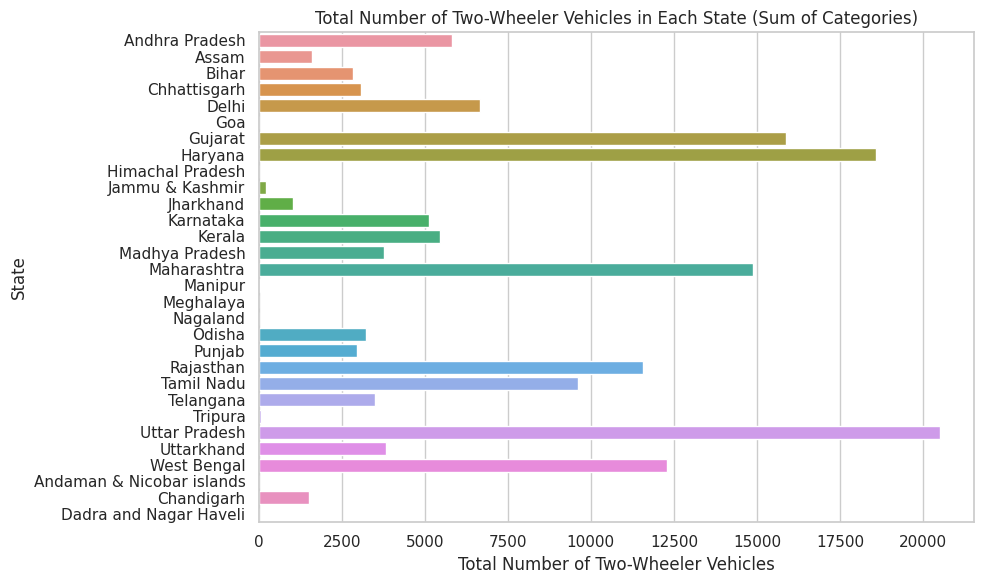

In [ ]:
# Sum the three columns to get the total number of two-wheeler vehicles

df1['Total Two Wheelers'] = df1[['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
                               'Two Wheelers (Category L2 (CMVR))',
                               'Two Wheelers (Max power not exceeding 250 Watts)']].sum(axis=1)

# Create a barplot using seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Optional: Set the style of the plot

# Plot the total number of two-wheeler vehicles using sns.barplot
sns.barplot(x="Total Two Wheelers", y="State", data=df1, orient="h")

# Customize plot labels and appearance
plt.xlabel("Total Number of Two-Wheeler Vehicles")
plt.ylabel("State")
plt.title("Total Number of Two-Wheeler Vehicles in Each State (Sum of Categories)")

# Show the plot
plt.tight_layout()
plt.show()

# *Analysis of 3 wheeler EV s*

## UttarPradesh, Chattisgarh, Haryana are among the top states with the majority of EV 3W vehicles, while the remaining states have less number .

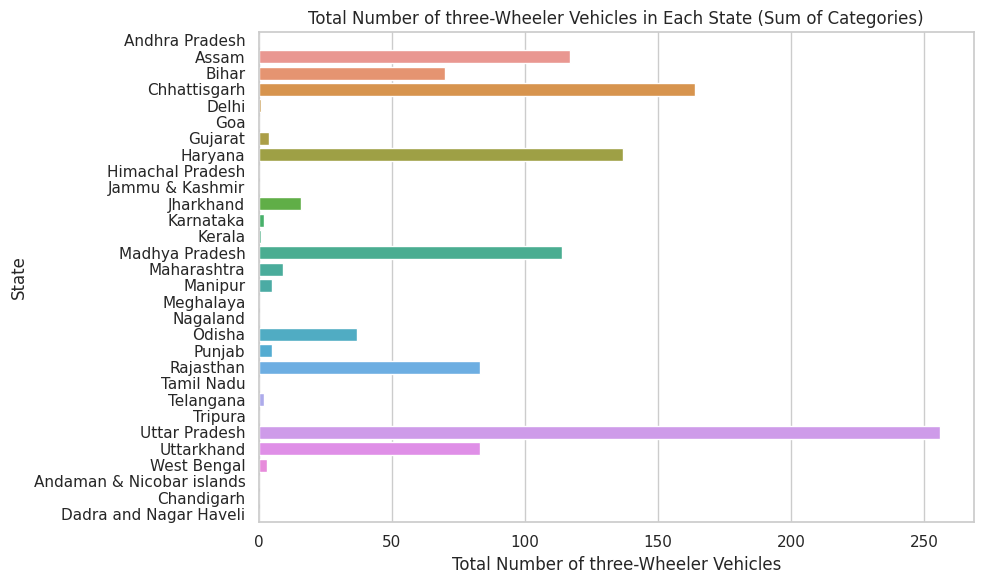

In [ ]:
# Sum the three columns to get the total number of two-wheeler vehicles
df1['Total Three Wheelers'] = df1[['Three Wheelers (Category L5 slow speed as per CMVR)',
                               'Three Wheelers (Category L5 as per CMVR)']].sum(axis=1)

# Create a barplot using seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Optional: Set the style of the plot

# Plot the total number of two-wheeler vehicles using sns.barplot
sns.barplot(x="Total Three Wheelers", y="State", data=df1, orient="h")

# Customize plot labels and appearance
plt.xlabel("Total Number of three-Wheeler Vehicles")
plt.ylabel("State")
plt.title("Total Number of three-Wheeler Vehicles in Each State (Sum of Categories)")

# Show the plot
plt.tight_layout()
plt.show()

# *# Analysis of Buses*

## Delhi, Goa, Maharashtra, Kerela and Karnataka are among the only states with EV buses in India .

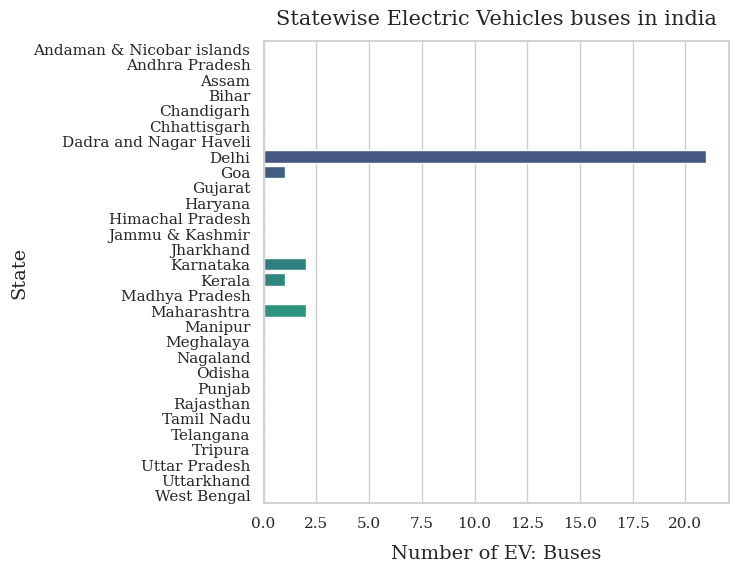

In [ ]:
# 4 wheelers data visualization from dataset 1
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['State'].sort_values(ascending=True), x='Buses', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: Buses', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles buses in india', weight=200, family='serif', size=15, pad=12)
plt.show()


# *Analysis of Passenger Cars*

## Maharashtra, Delhi and Gujrat are among the top states with the majority of EV Passenger cars, while the remaining states have less number .

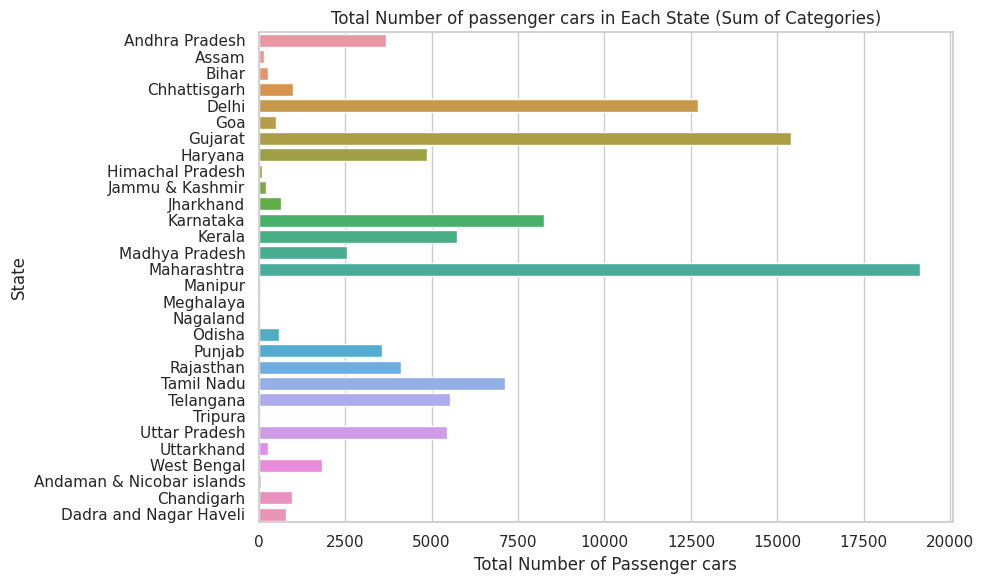

In [ ]:
# Sum the three columns to get the total number of two-wheeler vehicles
df1['Total Passenger cars'] = df1[['Passenger Cars (Category M1 as per CMVR)']].sum(axis=1)

# Create a barplot using seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Optional: Set the style of the plot

# Plot the total number of two-wheeler vehicles using sns.barplot
sns.barplot(x="Total Passenger cars", y="State", data=df1, orient="h")

# Customize plot labels and appearance
plt.xlabel("Total Number of Passenger cars")
plt.ylabel("State")
plt.title("Total Number of passenger cars in Each State (Sum of Categories)")

# Show the plot
plt.tight_layout()
plt.show()

# **DATASET 2 EDA**

# *Brand wise EV analysis*

## Tesla, Audi, Volkswagen, Nissan, Skoda tops the list of EVs with the maximum number of models in the Indian automobile market.

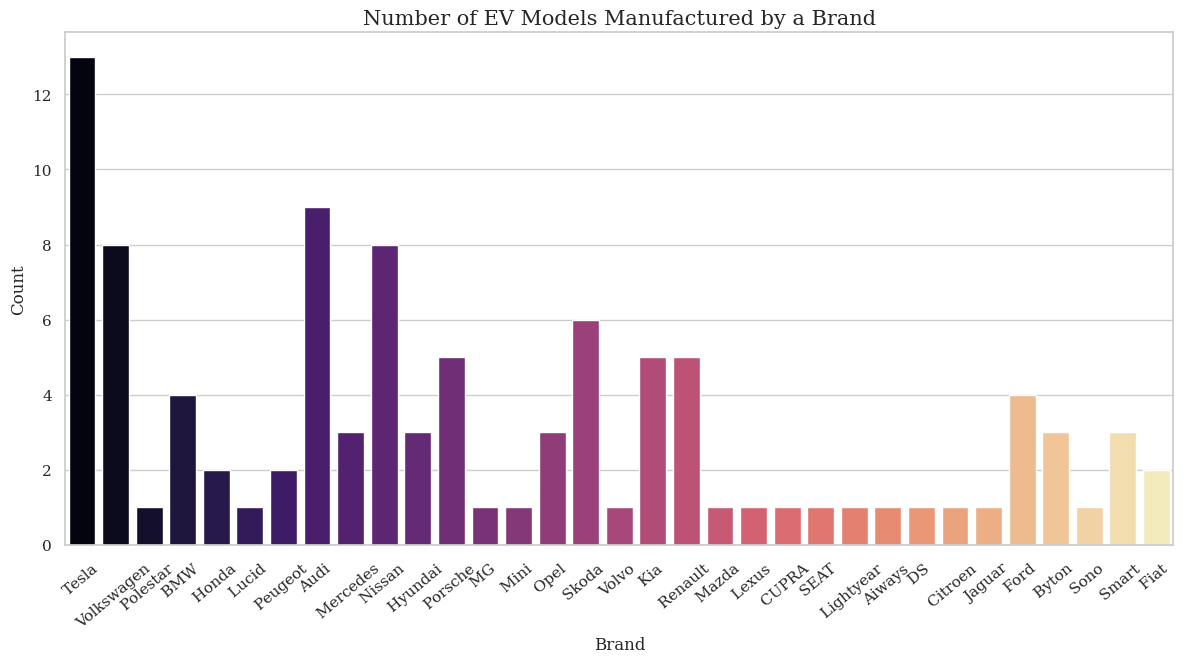

In [ ]:
# brand-wise count of EV models
sns.catplot(data=df2, x='Brand', kind='count',palette='magma' , height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Number of EV Models Manufactured by a Brand', family='serif', size=15)
plt.show()

# *Anaysis of different body types of EVs*

## SUV and Hatchback body types form the majority while Station and MPV the minority.

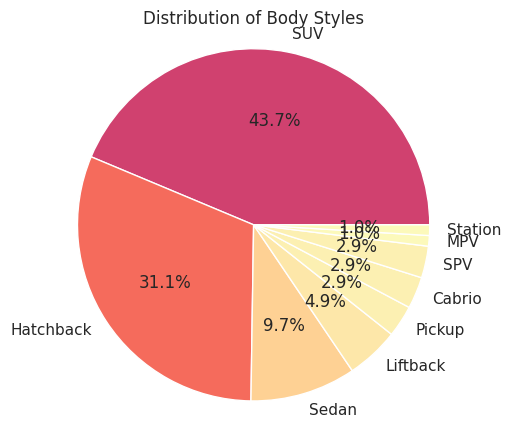

In [ ]:
from matplotlib import cm
dataset = df2['BodyStyle'].value_counts()

# Calculate the percentage of each body style
total_count = len(df2)  # Total count of records
percentages = (dataset / total_count) * 100

# Define a custom color palette using the "magma" colormap
colors = cm.magma_r(percentages / 100)  # Map colors to percentages

plt.figure(figsize=(5,5))
plt.pie(dataset, labels=dataset.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Body Styles')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


# *Analysis of EVs of different number of seats*

## EVs with 5 sitters dominate the market while EVs with 2 sitters are less in number.

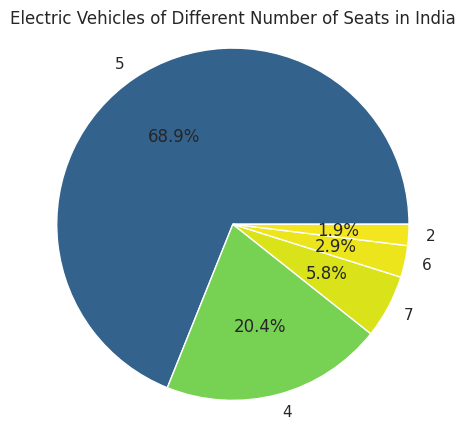

In [ ]:
dataset = df2['Seats'].value_counts()

# Calculate the percentage of each body style
total_count = len(df2)  # Total count of records
percentages = (dataset / total_count) * 100

# Define a custom color palette using the "magma" colormap
colors = cm.viridis_r(percentages / 100)  # Map colors to percentages

plt.figure(figsize=(5,5))
plt.pie(dataset, labels=dataset.index, autopct='%1.1f%%', colors=colors)
plt.title('Electric Vehicles of Different Number of Seats in India')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


# *Analysis of different segments of EVs*

## B and C body segments form the majority while S and A the minority.

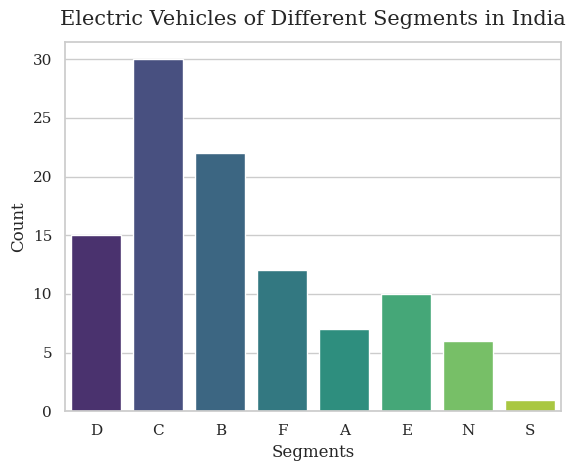

In [ ]:

# EVs of different number of seats from dataset 2
sns.countplot(data=df2, x='Segment', palette='viridis')
plt.xlabel('Segments', family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Electric Vehicles of Different Segments in India', family='serif', size=15, pad=12)
plt.show()

# *Analysis of EV bodystyle vs EV power train*

### For RWD and FWD power train of EVs, the most common body style is Hatch back and the least common one is MPV.
### For AWD, the most common body style is SUV and the least common one is MPV.

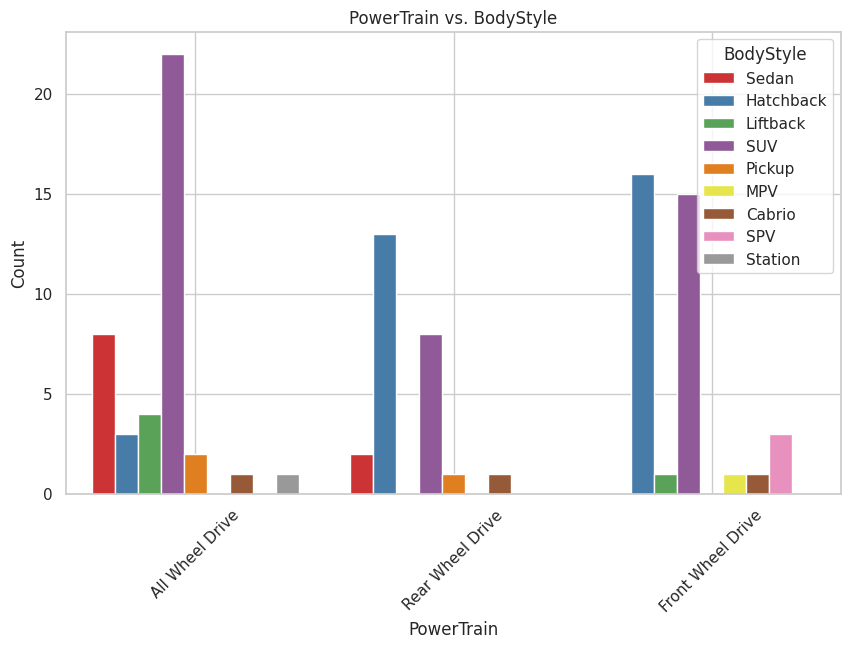

In [ ]:
# Categorical plot: PowerTrain vs. BodyStyle
plt.figure(figsize=(10, 6))
custom_palette = sns.color_palette("Set1")
sns.countplot(data=df2, x='PowerTrain', hue='BodyStyle', palette=custom_palette)
plt.title('PowerTrain vs. BodyStyle')
plt.xlabel('PowerTrain')
plt.ylabel('Count')
plt.legend(title='BodyStyle', loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# *Analysis of different plug types*

## EVs with plus type of 'Type 2 CCS' dominate the market.



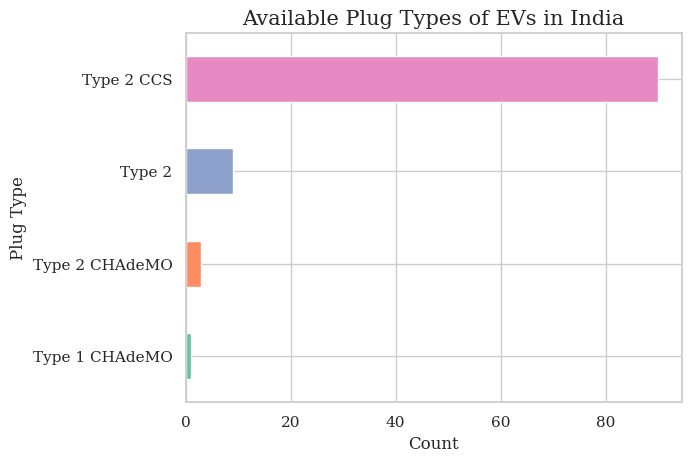

In [ ]:

# plug types visualization from dataset
custom_palette = sns.color_palette("Set2")
df2['PlugType'].value_counts().sort_values(ascending=True).plot.barh(color=custom_palette)
plt.xlabel('Count', family='serif', size=12)
plt.ylabel('Plug Type', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Available Plug Types of EVs in India', family='serif', size=15)
plt.show()

# *Analysis of Plug type used in every Segment*

## Across all segments Type 2 ccs is the most widely used C type.

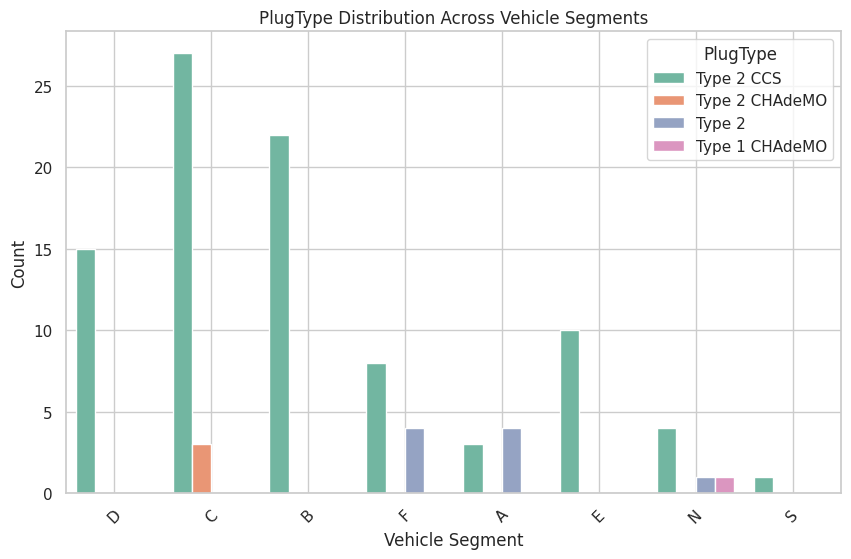

In [ ]:
plt.figure(figsize=(10, 6))
custom_palette = sns.color_palette("Set2")

sns.countplot(data=df2, x='Segment', hue='PlugType', palette=custom_palette)
plt.title('PlugType Distribution Across Vehicle Segments')
plt.xlabel('Vehicle Segment')
plt.ylabel('Count')
plt.legend(title='PlugType', loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# *Price Disitribution of EV s*

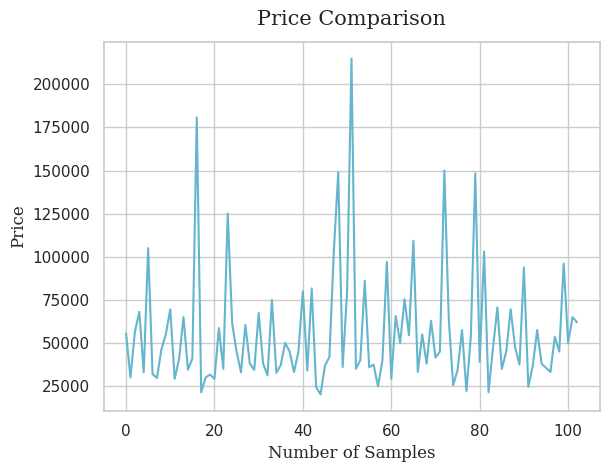

In [ ]:

# plotting the price from dataset 2
plt.plot(df2['PriceEuro'], color='c')
plt.xlabel('Number of Samples', family='serif', size=12)
plt.ylabel('Price', family='serif', size=12)
plt.title('Price Comparison', family='serif', size=15, pad=12);

# *Average price Range of EV s*

Text(0.5, 1.0, 'Price Distribution')

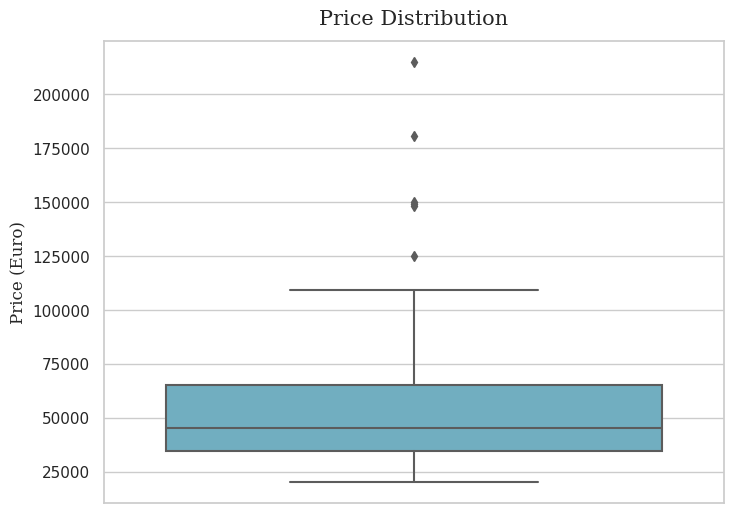

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df2, y='PriceEuro', color='c')
plt.ylabel('Price (Euro)', family='serif', size=12)
plt.title('Price Distribution', family='serif', size=15, pad=12)

# *Analysis of Price for different EV Segments*

## The price of EV s in Segment E can go upto 185000 Euros nd that of Segment S can go upto 300000 Euros

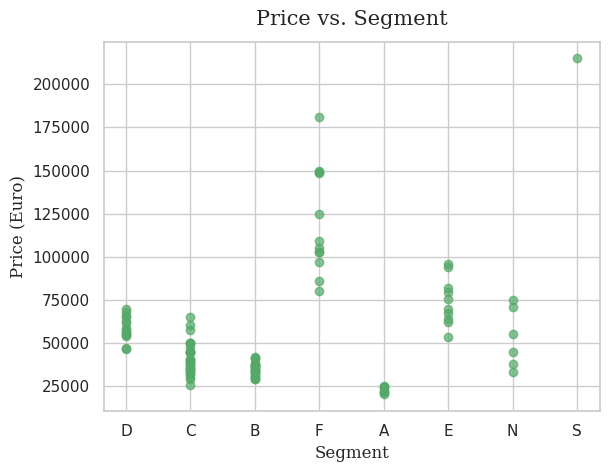

In [ ]:
plt.scatter(df2['Segment'], df2['PriceEuro'], color='g', alpha=0.7)
plt.xlabel('Segment', family='serif', size=12)
plt.ylabel('Price (Euro)', family='serif', size=12)
plt.title('Price vs. Segment', family='serif', size=15, pad=12)
plt.grid(True)

# *Conversion of object data type to float datatype for further analysis*

In [ ]:
df2['TopSpeed'] = df2['TopSpeed'].astype(str)
df2['TopSpeed'] = df2['TopSpeed'].str.replace(' km/h', '').astype(float)

#df2['TopSpeed'] = df2['TopSpeed'].str.split(' ').str[0].astype(float)
df2['Efficiency'] = df2['Efficiency'].astype(str)
df2['Efficiency'] = df2['Efficiency'].str.split(' ').str[0].astype(float)

df2['FastCharge'] = df2['FastCharge'].replace('-', '0')
df2['FastCharge'] = df2['FastCharge'].astype(str)
df2['FastCharge'] = df2['FastCharge'].str.replace(' km/h', '').astype(float)
#df2['FastCharge'] = df2['FastCharge'].str.replace('-', '').astype(float)

df2['Accel'] = df2['Accel'].astype(str)
df2['Accel'] = df2['Accel'].str.replace(' sec', '').astype(float)

df2['Range'] = df2['Range'].astype(str)
df2['Range'] = df2['Range'].str.split(' ').str[0].astype(float)
df2

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233.0,450.0,161.0,940.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160.0,270.0,167.0,250.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210.0,400.0,181.0,620.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180.0,360.0,206.0,560.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145.0,170.0,168.0,190.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160.0,330.0,191.0,440.0,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210.0,335.0,258.0,540.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200.0,325.0,194.0,440.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200.0,375.0,232.0,450.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,65000


# *Analysis of EVs based on accleration*

## Renault, Seat and Smart have the most Acceleration and are the top performers while Tesla, Lucid and Porsche have the lowest accelration.

<ipython-input-49-c42bc7365eb3>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df2, y='Brand', x='Accel', ci=None, palette='viridis')


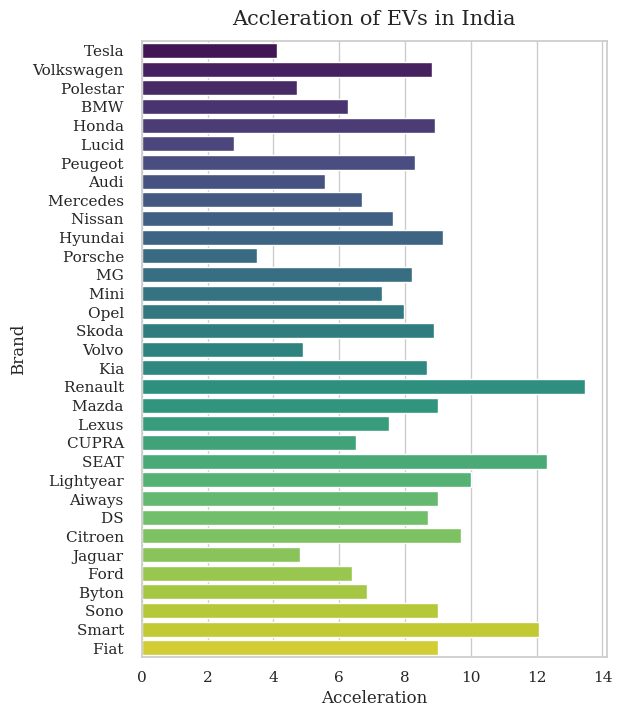

In [ ]:

# accleration visualization from dataset 2
plt.figure(figsize=(6, 8))
sns.barplot(data=df2, y='Brand', x='Accel', ci=None, palette='viridis')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Acceleration', family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)
plt.title(label='Accleration of EVs in India', family='serif', size=15, pad=12)
plt.show()

# *CORRELATION MATRIX*

<ipython-input-31-b69c21fa60cf>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df2.corr(), annot=True, cmap='Purples', cbar=False, square=True, fmt='.2f', linewidths=.3)


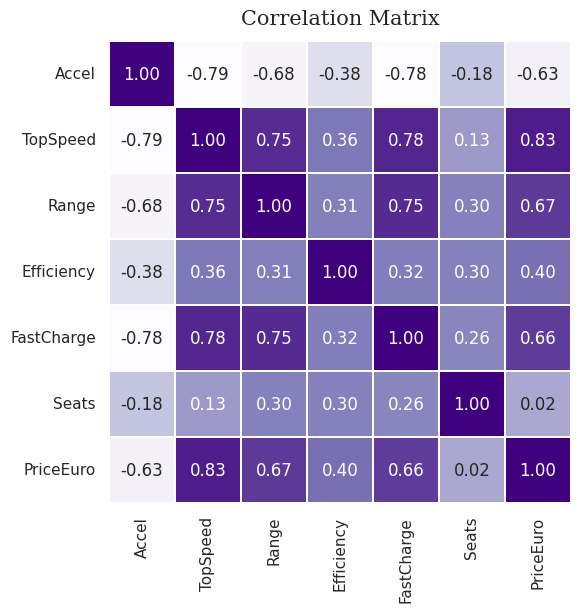

In [ ]:

# plotting the correlation matrix from dataset 3
plt.figure(figsize=(6,6))
sns.heatmap(data=df2.corr(), annot=True, cmap='Purples', cbar=False, square=True, fmt='.2f', linewidths=.3)
plt.title('Correlation Matrix', family='serif', size=15, pad=12);

# *Analysis of EVs based on the range parameter*

## Based on range (Km), Lucid, Lightyear and Tesla have the highest range and Smart the lowest.


<ipython-input-32-cf32c7413c70>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(kind='bar', data=df2, x='Brand', y='Range', palette='winter', ci=None, height=6, aspect=2)


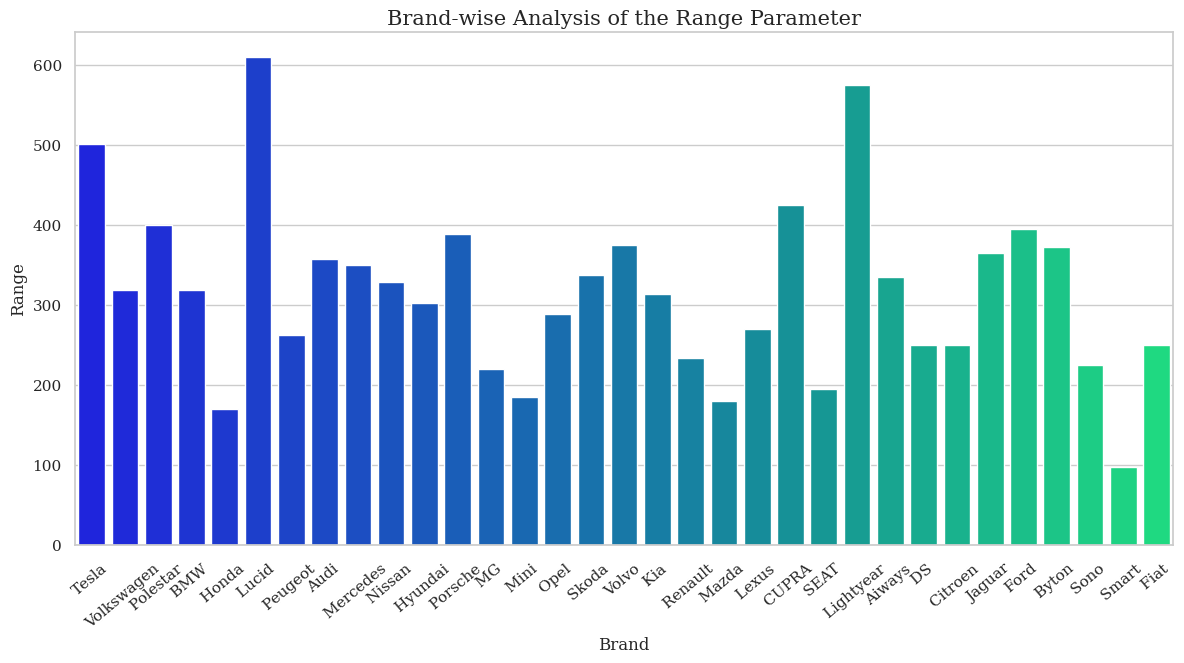

In [ ]:

# brand-wise analysis of the range parameter
sns.catplot(kind='bar', data=df2, x='Brand', y='Range', palette='winter', ci=None, height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Range', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Analysis of the Range Parameter', family='serif', size=15);


# Market Segmentation

---



# *Model Building Using K-Means Clusteing*

In [ ]:

# encoding the categorical features

# PowerTrain feature
df2['PowerTrain'].replace(to_replace=['Rear Wheel Drive','Front Wheel Drive','All Wheel Drive'],value=[0, 1, 2],inplace=True)

# RapidCharge feature
df2['RapidCharge'].replace(to_replace=['Rapid charging possible','Rapid charging not possible'],value=[0, 1],inplace=True)

In [ ]:
# selecting features for building a model
X = df2[['Accel','TopSpeed','Efficiency','FastCharge', 'Range', 'RapidCharge', 'Seats', 'PriceEuro','PowerTrain']]

In [ ]:
# feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
df2.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233.0,450.0,161.0,940.0,0,2,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160.0,270.0,167.0,250.0,0,0,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210.0,400.0,181.0,620.0,0,2,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180.0,360.0,206.0,560.0,0,0,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145.0,170.0,168.0,190.0,0,0,Type 2 CCS,Hatchback,B,4,32997


In [ ]:
# applying Principle Component Analysis (PCA)
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)
df2_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
df2_pca.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.327343,0.251058,-1.285910,-0.589550,0.741695,-1.336093,0.333731,-0.793532,-0.359102
1,-1.917169,-0.570523,-0.703815,0.599540,0.204536,0.345406,-0.399780,0.248018,-0.324925
2,1.528789,0.025753,-0.380455,-0.682523,0.108181,-0.727058,0.280288,0.031797,-0.086851
3,0.259288,-0.100156,-0.252992,1.609250,-0.149788,0.178422,-0.433796,-0.289689,0.186040
4,-2.566457,0.257976,-0.791391,0.322834,-0.899487,0.341113,-0.502423,0.126064,-0.165389


In [ ]:
# Get explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Print explained variance ratios for each PC
for i, explained_variance_ratio in enumerate(explained_variance_ratios):
    print(f"PC{i+1}: Explained Variance Ratio = {explained_variance_ratio:.4f}")

# Find the PC with the highest explained variance ratio
max_explained_variance_pc = explained_variance_ratios.argmax() + 1  # Add 1 to get the PC number
print(f"The PC with the highest explained variance is PC{max_explained_variance_pc}")

PC1: Explained Variance Ratio = 0.5375
PC2: Explained Variance Ratio = 0.1424
PC3: Explained Variance Ratio = 0.1072
PC4: Explained Variance Ratio = 0.0625
PC5: Explained Variance Ratio = 0.0584
PC6: Explained Variance Ratio = 0.0341
PC7: Explained Variance Ratio = 0.0257
PC8: Explained Variance Ratio = 0.0216
PC9: Explained Variance Ratio = 0.0106
The PC with the highest explained variance is PC1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

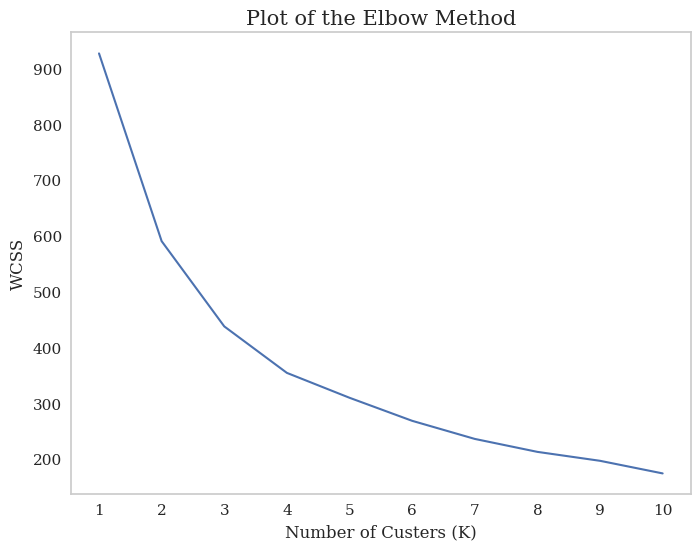

In [ ]:

# plotting the results of Elbow

wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [ ]:

# training the model using k=4 as rendered by the above plot
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=90)

In [ ]:

# check the size of clusters
pd.Series(kmean.labels_).value_counts()


0    55
1    30
3    13
2     5
dtype: int64

In [ ]:

# adding a new feature of cluster labels to the dataset 3
df2['clusters'] = kmean.labels_


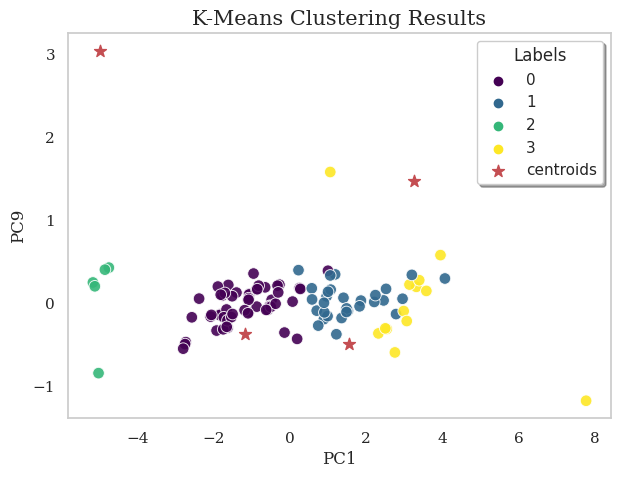

In [ ]:

# visualizing clusters
plt.figure(figsize=(7,5))
sns.scatterplot(data=df2_pca, x='PC1', y='PC9', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC9', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()

# *Cluster summary for type of EV s and their properties*

In [ ]:
cluster_summary = df2.groupby('clusters').agg({
    'Accel': 'mean',        # You can use 'median' instead of 'mean' if preferred
    'TopSpeed': 'mean',
    'Range': 'mean',
    'Efficiency': 'mean',
    'Seats': 'mean',
    'PriceEuro': 'mean'
})
print(cluster_summary)

              Accel    TopSpeed       Range  Efficiency     Seats  \
clusters                                                            
0          8.603636  156.163636  292.909091  174.563636  4.818182   
1          5.573333  196.266667  392.666667  219.066667  5.433333   
2         14.240000  131.000000  116.000000  175.400000  3.400000   
3          3.861538  255.769231  494.230769  187.230769  4.461538   

              PriceEuro  
clusters                 
0          37540.800000  
1          65793.533333  
2          26154.400000  
3         121482.230769  


# *Profiles for each cluster and EV s belonging to that cluster*

In [ ]:
cluster_profiles = {}

# Iterate through each cluster label
for cluster_label in df2['clusters'].unique():
    # Filter the data for the current cluster
    cluster_data = df2[df2['clusters'] == cluster_label]

    # Create a profile for the cluster
    profile = {
        'clusters': cluster_label,
        'Number of EVs': len(cluster_data),
        'Brands': cluster_data['Brand'].unique().tolist(),
        'Models': cluster_data['Model'].unique().tolist(),
        'PowerTrain Types': cluster_data['PowerTrain'].unique().tolist(),
        'Plug Types': cluster_data['PlugType'].unique().tolist(),
        'Body Styles': cluster_data['BodyStyle'].unique().tolist(),
        'Seats Range': f"{cluster_data['Seats'].min()}-{cluster_data['Seats'].max()}",
        'Price Range (Euro)': f"{cluster_data['PriceEuro'].min()}-{cluster_data['PriceEuro'].max()}",
        # Add more relevant information here based on your dataset
    }

    # Store the cluster profile in the dictionary
    cluster_profiles[cluster_label] = profile

# Display the cluster profiles
for cluster_label, profile in cluster_profiles.items():
    print(f"Cluster {cluster_label} Profile:")
    for key, value in profile.items():
        print(f"{key}: {value}")
    print("\n")

Cluster 3 Profile:
clusters: 3
Number of EVs: 13
Brands: ['Tesla ', 'Lucid ', 'Porsche ', 'Audi ', 'Lightyear ']
Models: ['Model 3 Long Range Dual Motor', 'Air ', 'Taycan Turbo S', 'e-tron GT ', 'Model 3 Long Range Performance', 'Model S Long Range', 'Taycan 4S', 'One ', 'Roadster ', 'Model S Performance', 'Taycan 4S Plus', 'Taycan Cross Turismo ', 'Taycan Turbo']
PowerTrain Types: [2]
Plug Types: ['Type 2 CCS', 'Type 2']
Body Styles: ['Sedan', 'Liftback', 'Cabrio', 'Station']
Seats Range: 4-5
Price Range (Euro): 55480-215000


Cluster 0 Profile:
clusters: 0
Number of EVs: 55
Brands: ['Volkswagen ', 'BMW ', 'Honda ', 'Peugeot ', 'Tesla ', 'Nissan ', 'Hyundai ', 'MG ', 'Mini ', 'Opel ', 'Skoda ', 'Kia ', 'Renault ', 'Mazda ', 'Lexus ', 'CUPRA ', 'SEAT ', 'Aiways ', 'DS ', 'Citroen ', 'Ford ', 'Sono ', 'Fiat ', 'Byton ']
Models: ['ID.3 Pure', 'iX3 ', 'e ', 'e-Golf ', 'e-208 ', 'Model 3 Standard Range Plus', 'Leaf ', 'Kona Electric 64 kWh', 'i4 ', 'IONIQ Electric', 'ID.3 Pro S', 'e-Up! ',